In [1]:
# Import packages 
import numpy as np
import pandas as pd
import pickle
from utils import noisy_arbitrary_funcs, generate_synth_data
from matplotlib import pyplot as plt

plt.rcParams['mathtext.fontset'] = 'cm' # dejavuserif
plt.rcParams['legend.framealpha'] = 1
plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['legend.title_fontsize'] = 'medium'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['xtick.labelsize'] = 'small'
plt.rcParams['ytick.labelsize'] = 'small'

# Synthetic spectra visualization
Some examples of synthetic LPFG spectra

## Varying the resonant wavelength

Below one can see some LPFG spectra with different resonant wavelength.

Both ideal/clean spectra and noisy spectra. Noise spectra were generate by adding extra attenuation bands with random parameters.

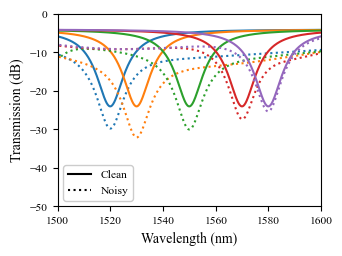

In [2]:
# LPFG parameters
target_wl_res = [1520, 1530, 1550, 1570, 1580]
coupling_strength = 20 # dB, the resonant dip depth
fwhm = 30e-9 # m, the full width at half maximum of the resonant dip
insertion_loss = 4 # dB, the insertion loss of the LPFG
function_number = 0.1 # to select a loretzian function
# Wavelength for simulation
wl = np.linspace(1450, 1650, 1000)

plt.figure(figsize=(3.4, 2.5))
for wlres in target_wl_res:
    T_noisy, T_clean = noisy_arbitrary_funcs(wl*1e-9, coupling_strength, wlres*1e-9, 
                        fwhm, insertion_loss, function_number)
    line = plt.plot(wl, T_clean, '-', label=None)
    c = line[0].get_color()
    plt.plot(wl, T_noisy, color=c, ls=':', label=None)
plt.xlim(1500, 1600)
plt.ylim(-50, 0)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission (dB)')
plt.plot([], [], 'k', label='Clean')
plt.plot([], [], ':k', label='Noisy')
plt.legend()
plt.show()

## Varying the coupling efficiency

A similar demonstration, however, with change in the resonant dip depth.

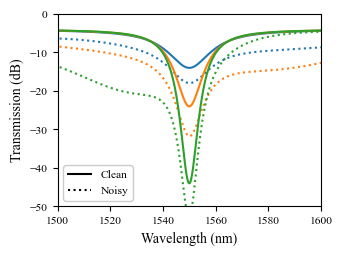

In [3]:
# LPFG parameters
wlres = 1550
target_coupling_strength = [10, 20, 40] # dB, the resonant dip depth
fwhm = 30e-9 # m, the full width at half maximum of the resonant dip
insertion_loss = 4 # dB, the insertion loss of the LPFG
function_number = 0.1 # to select a loretzian function

plt.figure(figsize=(3.4, 2.5))
for coupling_strength in target_coupling_strength:
    T_noisy, T_clean = noisy_arbitrary_funcs(wl*1e-9, coupling_strength, wlres*1e-9, 
                        fwhm, insertion_loss, function_number)
    line = plt.plot(wl, T_clean, '-', label=None)
    c = line[0].get_color()
    plt.plot(wl, T_noisy, color=c, ls=':', label=None)
plt.xlim(1500, 1600)
plt.ylim(-50, 0)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission (dB)')
plt.plot([], [], 'k', label='Clean')
plt.plot([], [], ':k', label='Noisy')
plt.legend()
plt.show()

## Varying the FWHM

Now varying the resonant dip's width

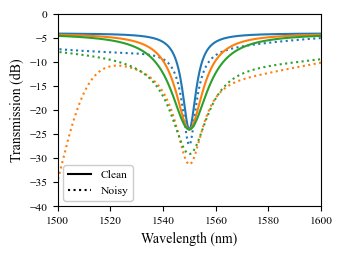

In [4]:
# LPFG parameters
wlres = 1550 # nm
coupling_strength = 20 # dB, the resonant dip depth
target_fwhm = [15e-9, 30e-9, 40e-9] # m, the full width at half maximum of the resonant dip
insertion_loss = 4 # dB, the insertion loss of the LPFG
function_number = 0.1 # to select a loretzian function

plt.figure(figsize=(3.4, 2.5))
for fwhm in target_fwhm:
    T_noisy, T_clean = noisy_arbitrary_funcs(wl*1e-9, coupling_strength, wlres*1e-9, 
                        fwhm, insertion_loss, function_number)
    line = plt.plot(wl, T_clean, '-', label=None)
    c = line[0].get_color()
    plt.plot(wl, T_noisy, color=c, ls=':', label=None)
plt.xlim(1500, 1600)
plt.ylim(-40, 0)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission (dB)')
plt.plot([], [], 'k', label='Clean')
plt.plot([], [], ':k', label='Noisy')
plt.legend()
plt.show()

# Data generation

Note that the model uses the FBG reflection. So, for training, the whole spectrum is not needed.

For time and memory efficiency, the synthetic LPFG is only simulated at the FBG position.

Below an example of data generation using the same parameters as the paper.

In [5]:
# Parameters for random spectra generation
# I.e., the parameters of rand_function - limits of a uniform distribution
param = {'x':    [1510e-9, 1590e-9],  # base wavelength interval for FBGs
         'a':    [10, 40],            # depth
         'x0':   [1515e-9, 1585e-9],  # resonant wavelength
         'w':    [15e-9, 40e-9],      # fwhm
         'bias': [0, 10],             # insertion loss
         'fcn':  [0, 1]}

#Number of different spectra
# At the paper 20000 was used for model selection and 25000 for fine tuning
N = 100

# Number of noisy FBG per spectrum
# At the paper 10 was used for model selection and 20 for fine tuning
k = 5

# Number of generated input data is double N*k due to clean and noisy spectra
N_spec = 2*N*k

# Generate synthetic data (results might differ for each round)
dataset = generate_synth_data(param, N, k)
# Data is stored in a dictionary
print("Dataset stored as a dictionary with keys:")
print(dataset.keys())

100%|██████████| 100/100 [00:00<00:00, 2034.43it/s]

Dataset stored as a dictionary with keys:
dict_keys(['input_strength', 'input_strength_clean', 'wl_bragg', 'target'])


## Show some random synthetic LPFG filtered FBG peaks

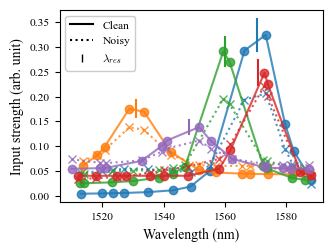

In [6]:
# Define the number of plots
N_plot = 5
random_samples = np.random.choice(np.arange(0, len(dataset['wl_bragg'])), N_plot, replace=False)
plt.figure(figsize=(3.4, 2.5))
for i in range(0, N_plot):
    sample = random_samples[i]
    line = plt.plot(dataset['wl_bragg'][sample], dataset['input_strength_clean'][sample], '-o', alpha=0.8)
    plt.plot(dataset['wl_bragg'][sample], dataset['input_strength'][sample], ':x', color=line[0].get_color(), alpha=0.8)
    p = [max(dataset['input_strength_clean'][sample]), 
        max(dataset['input_strength'][sample])]

    plt.plot([dataset['target'][sample], dataset['target'][sample]], 
            [max(p)*0.9, max(p)*1.1], '-', color=line[0].get_color(), label=None)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Input strength (arb. unit)')
plt.plot([], [], 'k', label='Clean')
plt.plot([], [], ':k', label='Noisy')
plt.plot([], [], '|k', label='$\lambda_{res}$')
plt.legend()
plt.show()